# Chat ou Chien !! une méthode d'apprentissage automatique.

Dans une entreprise de marketing, on veut faire une étude sur les clients qui fréquentent un grand magasin. L'idée est d'estimer le pourcentage de clients qui ont des chats et ceux qui ont des chiens, afin de prendre des décisions marketing ciblées. Vous proposez d'utiliser une caméra pour détecter et compter les deux animaux dans le magasin. La première étape du projet est de développer un modèle qui peut détecter le chat ou le chien. Ainsi, dans ce brief, en utilisant une base de données, vous allez entrainer un modèle d'apprentissage automatique avec un apprentissage supervisé.

# Veille technologique: Opencv python

- Préparation données imagerie pour méthode classique d'apprentissage automatique
- Entrainement et évaluation (similaire aux briefs précédents)

## Operations Simples

In [1]:
# use opencv to load and display the image
import os
from os import listdir
import cv2
from skimage.io import imread, imsave, imshow
import numpy as np
from numpy import load
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from numpy import save, asarray





In [2]:
# Préparer data 
size = 150
# repertoir d'images avec deux sous dossiers "Cat" et "Dog"
image_directory = r"C:/Users/utilisateur/Downloads/kagglecatsanddogs_3367a/PetImages"
images = []  # liste pour images  
label = []  # liste pour Label (0 ou 1) pour deux classes.

# utiliser "os" pour avoir les noms des images dans chaque sous dossier
cat_images = os.listdir("PetImages/Cat")
dog_images = os.listdir("PetImages/Dog")

In [20]:
#boucle

dim=(size,size)

#chat
for file_name in cat_images:
    path=image_directory+"/Cat/"+file_name
    try:
        img=imread(path)
        img=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
        img=np.array(img)
        
        
        if(img.shape[2]>3):
            img_temp=np.copy(img[:,:,0:3])
            img=np.copy(img_temp)
            
    except:
            print(f"erreur sur l'image {file_name}")
    
    else:
        images.append(img)
        label.append(0)
        
    
    
#chien
for file_name in dog_images:
    path=image_directory+"/Dog/"+file_name
    try:
        img=imread(path)
        img=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
        img=np.array(img)
        
        
        if(img.shape[2]>3):
            img_temp=np.copy(img[:,:,0:3])
            img=np.copy(img_temp)
            
    except:
        print(f"erreur sur l'image {file_name}")
        
    else:
        images.append(img)
        label.append(1)

erreur sur l'image 10404.jpg
erreur sur l'image 2939.jpg
erreur sur l'image 5686.jpg
erreur sur l'image 666.jpg
erreur sur l'image 7276.jpg
erreur sur l'image 11702.jpg
erreur sur l'image 1308.jpg
erreur sur l'image 1773.jpg
erreur sur l'image 3823.jpg


C:\Users\utilisateur\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [7]:
"""
# utiliser une boucle pour lire chaque image, redimensionner en (150,150,3),
# et la mettre dans images, et mettre le label(0 ou 1) selon le type dans "label"

for file in listdir("PetImages/Dog/"):
   
    #load image
    
    try:
        image=np.float32(load_img("PetImages/Dog/"+file))
        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)
      
        #convert to numpy array
        image=img_to_array(image)
        images.append(image)
        label.append(0)
        
    except:
        print(f"erreur sur l'image {file}")
        
    #else:
        #images.append(image)
        #label.append(0)


for file in listdir("PetImages/Cat/"):
    
   
    #load image
    
    try:
        image=np.float32(load_img("PetImages/Cat/"+file))
        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)
        #convert to numpy array
        image=img_to_array(image)
        images.append(image)
        label.append(1)
    except:
        print(f"erreur sur l'image {file}")
        
    #else:
        #images.append(image)
        #label.append(1)


    
    #convert to a numpy array
images=asarray(images)
label=asarray(label)
            
# il y a des images corrumpues, utiliser try ... catch except pour les ignorer


"""


'\n# utiliser une boucle pour lire chaque image, redimensionner en (150,150,3),\n# et la mettre dans images, et mettre le label(0 ou 1) selon le type dans "label"\n\nfor file in listdir("PetImages/Dog/"):\n   \n    #load image\n    \n    try:\n        image=np.float32(load_img("PetImages/Dog/"+file))\n        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)\n      \n        #convert to numpy array\n        image=img_to_array(image)\n        images.append(image)\n        label.append(0)\n        \n    except:\n        print(f"erreur sur l\'image {file}")\n        \n    #else:\n        #images.append(image)\n        #label.append(0)\n\n\nfor file in listdir("PetImages/Cat/"):\n    \n   \n    #load image\n    \n    try:\n        image=np.float32(load_img("PetImages/Cat/"+file))\n        resized=cv2.resize(image,(size,size), interpolation=cv2.INTER_AREA)\n        #convert to numpy array\n        image=img_to_array(image)\n        images.append(image)\n        label.appen

In [21]:
# show shape
print(len(images))
print(len(label))

49982
49982


In [22]:
# transformer les listes en numpy 
np_images = np.array(images)
np_label = np.array(label)

In [23]:
# save data as ".npy" file
np.save("dog_cat_images.npy",images)
np.save("dog_cat_label.npy",label)


In [24]:
# show shape
print(np_images.shape)
print(np_label.shape)

(49982, 150, 150, 3)
(49982,)


In [25]:
# prepare data for classical machine learning model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [26]:
X=np.load("dog_cat_images.npy")
y=np.load("dog_cat_label.npy")
X_reshaped=np.reshape(X,(X.shape[0],150*150*3))

In [27]:
X_reshaped.shape

(49982, 67500)

In [28]:
# split les données en train et test avec "stratification"
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.33, random_state=42, stratify = y)

In [29]:
X_train.shape

(33487, 67500)

In [30]:
X_test.shape

(16495, 67500)

In [31]:
y_train.sum()

8372

In [32]:
y_test.sum()

4124

In [35]:
#initialiser le classifierc
clf=RandomForestClassifier(n_estimators=100,max_depth=20,random_state=0,verbose=2)
#entrainer le classifier
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 19.3min finished


RandomForestClassifier(max_depth=20, random_state=0, verbose=2)

In [36]:
# evaluate classifier
from sklearn.metrics import classification_report
# predire
y_pred = clf.predict(X_test)
# evaluer avec classification_report
print(classification_report(y_test, y_pred, target_names=["chat","chien"]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


              precision    recall  f1-score   support

        chat       0.70      0.78      0.74     12371
       chien       0.00      0.00      0.00      4124

    accuracy                           0.59     16495
   macro avg       0.35      0.39      0.37     16495
weighted avg       0.53      0.59      0.55     16495



In [27]:
"""#Créer répertoires
dataset_home="dataset_dogs_vs_cats/"
subdirs=["train/","test/"]
for subdir in subdirs:
    #create label subdirectories
    labeldirs=["dogs/","cats/"]
    for labldir in labeldirs:
        newdir=dataset_home+subdir+labldir
        os.makedirs(newdir,exist_ok=True)"""

In [28]:
"""#retenir au hasard 25% des images dans l'ensemble de données de test
#seed random number generator
seed(1)
#define ration of picture to use for validation
val_ratio=0.25
#copy training dataset images into subdirectories
src_directory="C:/Users/utilisateur/dataset_dogs_vs_cats/train"
for file in listdir(src_directory):
    src=src_directory+"/"+file
    dst_dir="train/"
    if random()<val_ratio:
        dst_dir="test/"
    if file.startswith("1"):
        dst=dataset_home+dst_dir+"cats/"+file
        copyfile(src,dst)
    elif file.startswith("0"):
        dst=dataset_home+dst_dir+"dogs/"+file
        copyfile(src,dst)"""

### Essayer de normaliser chaque image entre 0 et 255 et rentrainer le modèle. Y a-t-il une amélioration ?

# Neural networ MLP

Entrainer un modèle MLP pour detecter la class Dog ou Cat.

In [46]:
# use PCA to reduce dimensions
# check this tuto: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# creer un reseau de neurone avec une couche d'entrée de taille (150*150*3), deux couches caché de taille 128 et une activation "relu". 
# Dernière couche de taille 1 avec une activation sigmoid. Choisir la bonne "loss function" et "optimizer"


In [102]:
# entrainer le modèle avec validation_split = 2, epochs = 20, et un batch_size = 128



def create_model(lyrs=128,activation="relu", optimizer="adam", loss='SparseCategoricalCrossentropy', dr=0.2):
    num_classes = 2
    
    #Set ranfom seed for reproducibility
    seed(42)
    set_seed(42)
    
    model = tf.keras.Sequential()
    model.add(layers.experimental.preprocessing.Rescaling(1./255)),#normalise de 0 a 1
    #model.add(layers.Conv2D(lyrs,(4,4), activation='relu'))
    #model.add(layers.MaxPooling2D())#réduit l'image
    #model.add(layers.Conv2D(64,(4,4), activation='relu'))
    #model.add(layers.MaxPooling2D())#prend le max du pooling
    #model.add(layers.Conv2D(32,(4,4), activation='relu'))
    #model.add(layers.MaxPooling2D())
    #model.add(layers.Conv2D(16,(4,4), activation='relu'))
    #model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())#permet de construire un vecteur
    model.add(layers.Dense(lyrs,activation=activation))
    model.add(layers.Dense(64,activation=activation))
    model.add(layers.Dense(32,activation=activation))
    model.add(layers.Dense(num_classes, activation='softmax'))


    model.compile(optimizer=optimizer,
              loss=loss,
      metrics=['accuracy'],)

    return model


In [90]:
#Choix pour chaque paramètre
activation = ["relu", "sigmoid"]
optimizer = ["adam", "adagrad","RMSprop","SGD","Adadelta","Ftrl","softmax"]
unit = [[1,8],[8],[10],[10,5],[12,6],[12,8,4]]
loss=["sparse_categorical_crossentropy","mean_squared_error",]
drops = [0.0,1.0]
nb_epoch = [10, 600]
batch_size = [1,200]

In [99]:
model=KerasClassifier(build_fn=create_model, verbose=0)

In [101]:
params = dict(activation=activation, 
                  optimizer=optimizer, 
                  loss=loss,
                  dr=drops,
                  nb_epoch=nb_epoch, 
                  batch_size=batch_size)

grid = GridSearchCV(estimator=model, param_grid=params,cv=10,verbose=2)# include n_jobs=-1 if you are using CPU
grid_result=grid.fit(X_train,y_train)



Fitting 10 folds for each of 224 candidates, totalling 2240 fits
[CV] END activation=relu, batch_size=1, dr=0.0, loss=sparse_categorical_crossentropy, nb_epoch=10, optimizer=adam; total time=17.7min
[CV] END activation=relu, batch_size=1, dr=0.0, loss=sparse_categorical_crossentropy, nb_epoch=10, optimizer=adam; total time=17.1min
[CV] END activation=relu, batch_size=1, dr=0.0, loss=sparse_categorical_crossentropy, nb_epoch=10, optimizer=adam; total time=17.0min


KeyboardInterrupt: 

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

In [103]:
model=create_model(lyrs=128,activation="relu", optimizer="adam", loss='SparseCategoricalCrossentropy', dr=0.2)

In [104]:
history=model.fit( X_train,y_train,epochs=20,
                  batch_size=128,validation_split=0.2)


Epoch 1/20
210/210 [==============================] - 17s 83ms/step - loss: 1.3642 - accuracy: 0.6501 - val_loss: 0.9613 - val_accuracy: 0.3174
Epoch 2/20
210/210 [==============================] - 17s 82ms/step - loss: 0.6607 - accuracy: 0.6977 - val_loss: 0.7662 - val_accuracy: 0.4606
Epoch 3/20
210/210 [==============================] - 17s 81ms/step - loss: 0.6293 - accuracy: 0.7104 - val_loss: 0.6559 - val_accuracy: 0.7462
Epoch 4/20
210/210 [==============================] - 17s 80ms/step - loss: 0.5818 - accuracy: 0.7325 - val_loss: 0.5804 - val_accuracy: 0.7462
Epoch 5/20
210/210 [==============================] - 17s 80ms/step - loss: 0.5711 - accuracy: 0.7419 - val_loss: 0.5925 - val_accuracy: 0.7460
Epoch 6/20
210/210 [==============================] - 17s 81ms/step - loss: 0.5662 - accuracy: 0.7407 - val_loss: 0.6508 - val_accuracy: 0.5796
Epoch 7/20
210/210 [==============================] - 17s 82ms/step - loss: 0.5654 - accuracy: 0.7443 - val_loss: 0.5739 - val_accuracy:

In [105]:
model.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_86 (Rescaling)     (None, 67500)             0         
_________________________________________________________________
flatten_85 (Flatten)         (None, 67500)             0         
_________________________________________________________________
dense_107 (Dense)            (None, 128)               8640128   
_________________________________________________________________
dense_108 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_109 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_110 (Dense)            (None, 2)                 66        
Total params: 8,650,530
Trainable params: 8,650,530
Non-trainable params: 0
___________________________________________

In [106]:
# evaluate MLP
# evaluate classifier
from sklearn.metrics import classification_report
# predire
y_pred=model.predict(X_test)
print(y_pred)

[[0.81239176 0.18760817]
 [0.7006967  0.29930326]
 [0.6289593  0.37104073]
 ...
 [0.7998688  0.20013125]
 [0.67256624 0.32743374]
 [0.6957559  0.30424407]]


In [107]:
y_pred.shape

(16495, 2)

In [108]:
_,train_acc=model.evaluate(X_train,y_train)
_,test_acc=model.evaluate(X_test,y_test)
print(f"Train ; {train_acc}, Test: {test_acc}")

516/516 [==============================] - 9s 18ms/step - loss: 0.5524 - accuracy: 0.7500
Train ; 0.7499925494194031, Test: 0.749984860420227


#Courbe d'apprentissage

In [109]:
import matplotlib.pyplot as plt

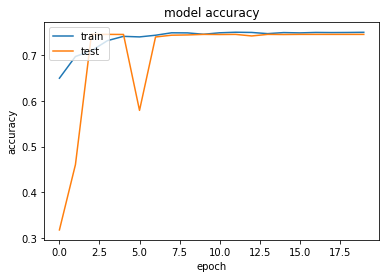

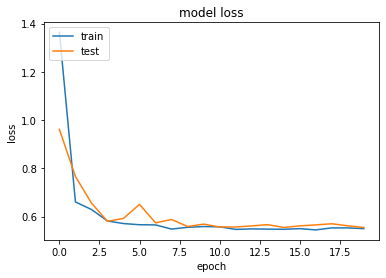

In [110]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
